# Data Literacy
#### University of Tübingen, Winter Term 2021/22
## Exercise Sheet 7
&copy; 2021 Prof. Dr. Jakob Macke & Marius Hobbhahn

This sheet is **due on Monday, December 13, 2021 at 10am sharp (i.e. before the start of the lecture).**

---

## Regression - part II

Last week we focused on implementing linear regression on our own. This week, we will use packaged functions from scikit learn. We will start with logistic regression and then look into multi-dimensional inputs, regularization and cross validation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Part I: 1-dimensional logistic regression

Regression can also be used to predict probabilities given binary events. For this, we will start using sklearn.

**Tasks:**
1. Import the exams.csv data and use the sklearn tool LogisticRegression
2. Plot the resulting values with the fitted function

In [2]:
from sklearn.linear_model import LogisticRegression

In [3]:
### make the dataset

hours_studied = np.array([0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50])
passed_exam = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])
df_exams = pd.DataFrame(list(zip(hours_studied, passed_exam)), columns=["hours_studied", "exam_passed"])
df_exams.to_csv("exams.csv")

In [4]:
### import the dataset 
df_exams = pd.read_csv('exams.csv')
hours_studied = df_exams["hours_studied"].values
exam_passed = df_exams["exam_passed"].values

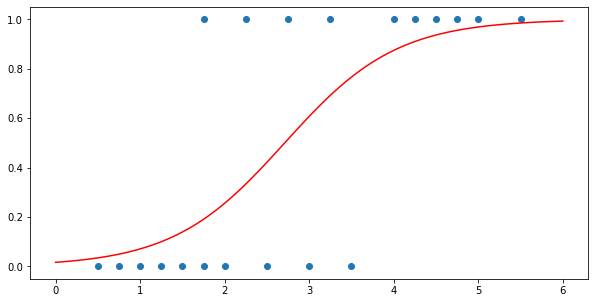

[[1.50464522]]


In [5]:
### run and plot
clf = LogisticRegression(penalty='none').fit(hours_studied.reshape(-1, 1), exam_passed)
x_pred = np.linspace(0, 6, 100+1)
y_pred = clf.predict_proba(x_pred.reshape(-1, 1))
plt.figure(figsize=(10, 5))
plt.scatter(hours_studied, exam_passed)
plt.plot(x_pred, y_pred[:,1], color='red')
plt.show()
print(clf.coef_)

### Part II: multi-dimensional linear regression

Now that we have a good intuition, we will scale the process to multiple input dimensions.

We will use data on life expectancy which can be found here: https://www.kaggle.com/kumarajarshi/life-expectancy-who

**Tasks:** 

1. Import the life_expectancy.csv data
2. Use sklearn's LinearRegression to fit the data
3. Make a plot of the coefficients. What do they mean? How can we interpret the results?
4. If you find a problem with the coefficients, suggest and implement a solution.

In [6]:
df_life_expectancy = pd.read_csv('data_original/Life Expectancy Data.csv')
df_le = df_life_expectancy[['Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']]
df_le = df_le.dropna()
df_le.to_csv('life_expectancy.csv')

In [7]:
df_le = pd.read_csv("life_expectancy.csv")
life_expectancy = df_le["Life expectancy "].values
predictors = df_le[['Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']].values

In [8]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression(fit_intercept=True).fit(predictors, life_expectancy)
clf.coef_

array([-1.68885302e-02,  9.36938378e-02, -5.43483450e-02,  3.77682623e-04,
       -5.58249970e-03, -8.61733822e-06,  3.34980599e-02, -7.04701961e-02,
        7.83637889e-03,  7.97522211e-02,  1.43889187e-02, -4.38298048e-01,
        1.38327405e-05, -6.91652444e-10, -8.67022868e-03, -5.12278224e-02,
        9.82414672e+00,  8.78334955e-01])

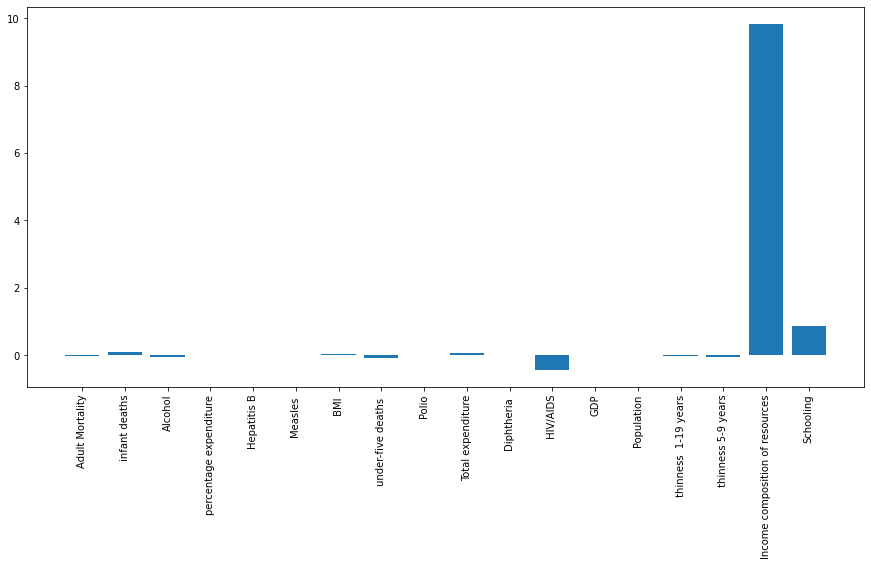

In [9]:
labels = ['Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']
x_ = np.arange(len(labels))

fig, ax = plt.subplots(1, 1, figsize=(15, 7))
ax.bar(x_, clf.coef_)
ax.set_xticks(x_)
ax.set_xticklabels(labels, rotation=90)
plt.show();

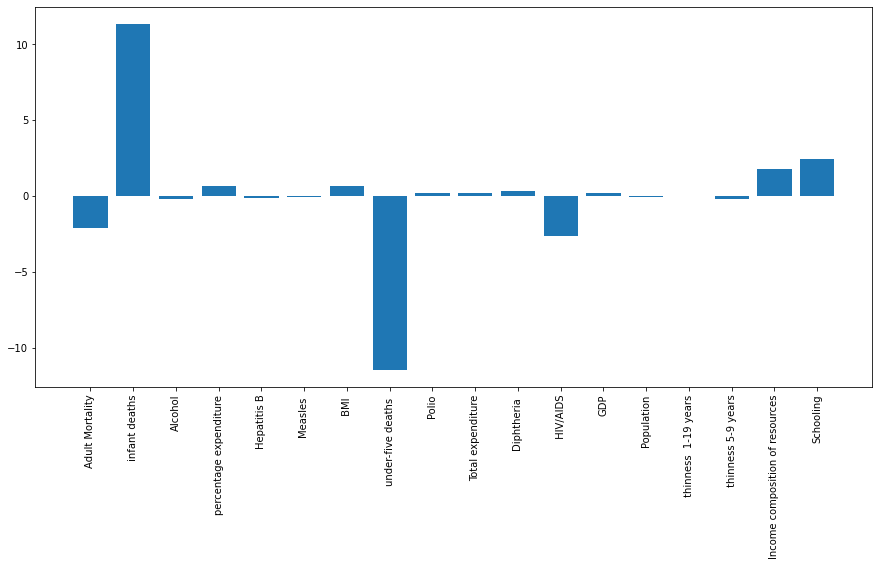

In [10]:
# Problem 1: the data isn't scaled
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(predictors)
predictors_scaled = scaler.transform(predictors)

clf_scaled = LinearRegression(fit_intercept=True).fit(predictors_scaled, life_expectancy)
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
ax.bar(x_, clf_scaled.coef_)
ax.set_xticks(x_)
ax.set_xticklabels(labels, rotation=90)
plt.show();

**solution:** We can't interpret the results, because they might not have the right scale. We can standardize them as below but we still have to take the meaning of the variables into context, i.e. some variables might be sign-flipped in meaning

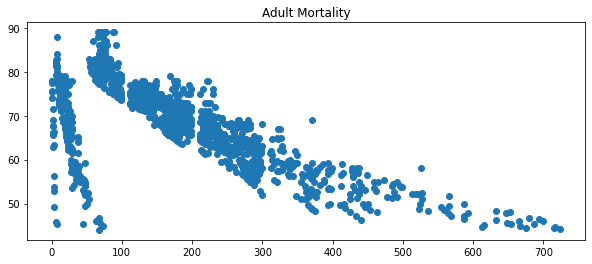

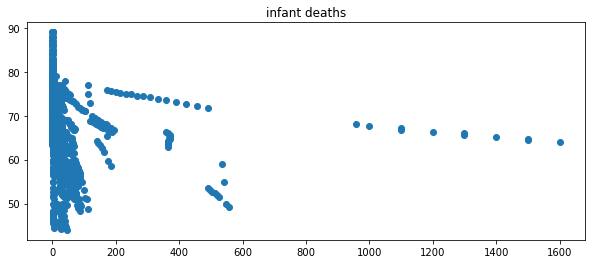

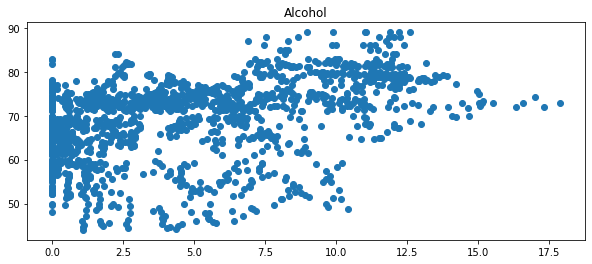

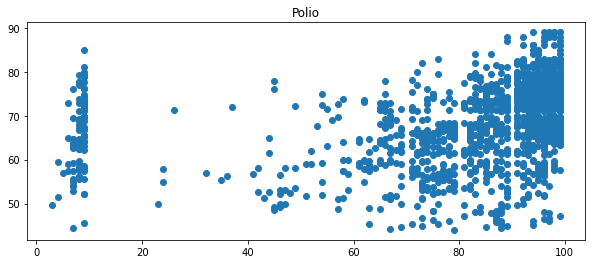

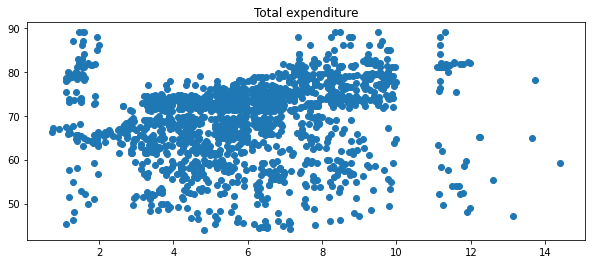

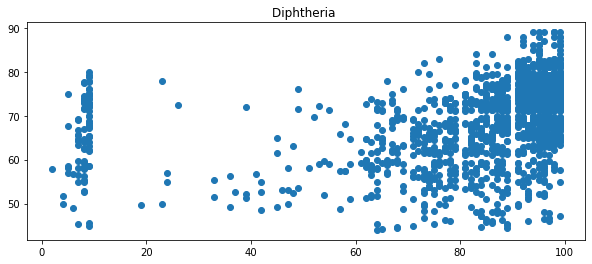

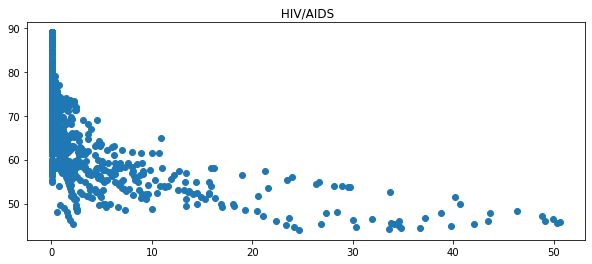

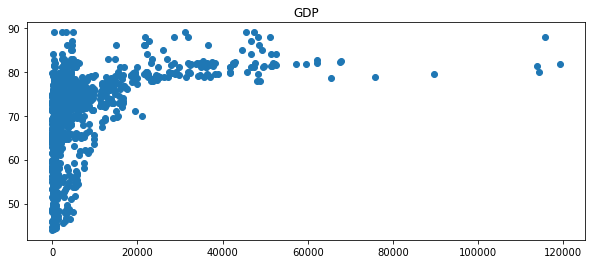

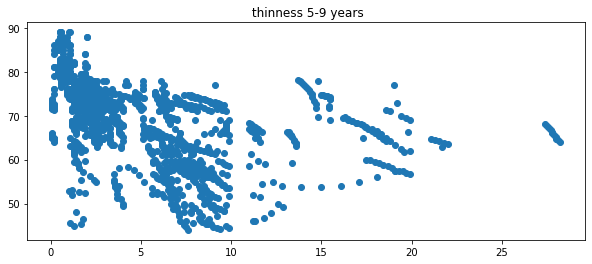

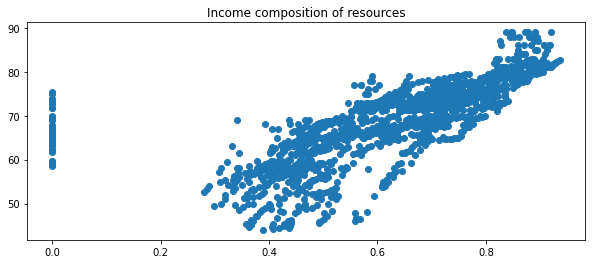

In [11]:
# Problem 2: The data might not be linear. Thus, the coefficients might be pretty meaningless.
for l in labels:
    plt.figure(figsize=(10, 4))
    plt.scatter(df_le[l].values, df_le["Life expectancy "].values)
    plt.title(l)
    plt.show();
# Does this look linear to you? 

In [12]:
# Problem 3: The variables might be correlated. Then it becomes much harder to dissect 
# the "correct contribution" of every variable. Fixing this is out of the scope of this exercise.

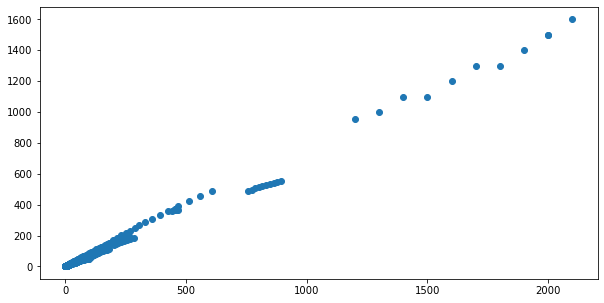

In [22]:
# TODO: plot infant vs under 5 deaths
plt.figure(figsize=(10, 5))
plt.scatter(df_le['under-five deaths '], df_le['infant deaths'])
plt.show()

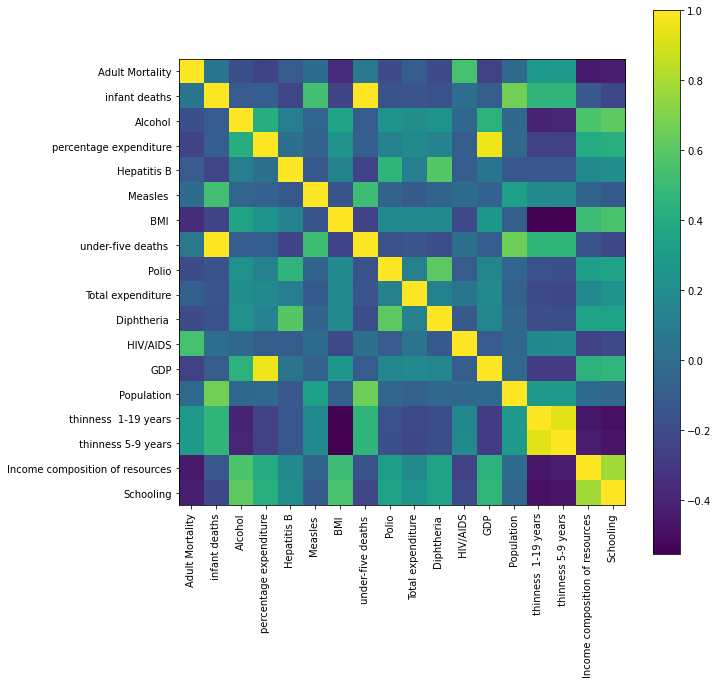

In [40]:
# TODO plot correlation matrix between all predictors
labels = ['Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']
x_ = range(len(labels))
cor = df_le[labels].corr()

fig, ax = plt.subplots(1,1, figsize=(10, 10))
im = ax.imshow(cor)
ax.set_xticks(x_)
ax.set_yticks(x_)
ax.set_xticklabels(labels, rotation=90)
ax.set_yticklabels(labels, rotation=0)

plt.colorbar(im, ax=ax)
plt.show()

### Part III: Regularization

We will use the data on life expectancy once again. This time, however, we will regularize our regression.

**Tasks:**

1. Use Ridge and Lasso from sklearn to fit the data. 
2. What is supposed to change in theory? Can you see this in practice?

In [14]:
from sklearn.linear_model import Lasso, Ridge

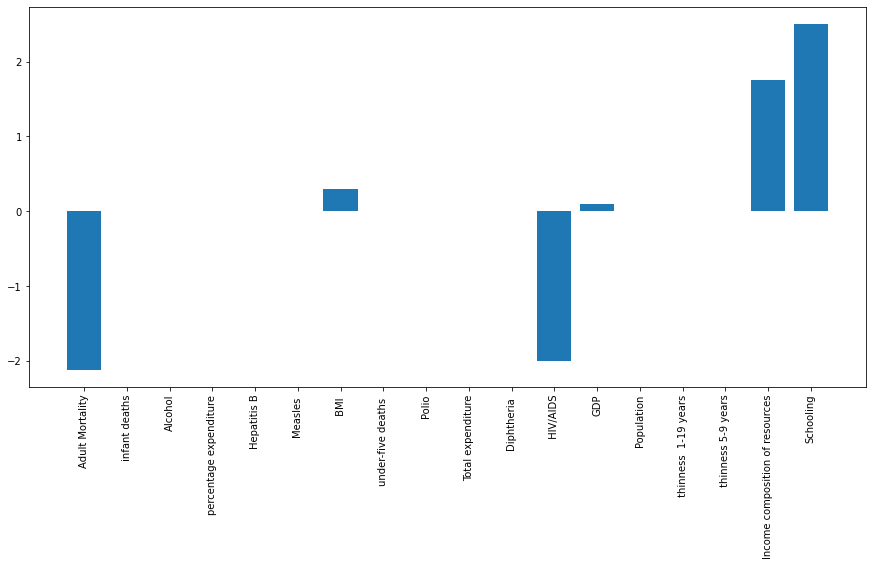

In [15]:
clf_scaled_lasso = Lasso(alpha=1, fit_intercept=True).fit(predictors_scaled, life_expectancy)
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
ax.bar(x_, clf_scaled_lasso.coef_)
ax.set_xticks(x_)
ax.set_xticklabels(labels, rotation=90)
plt.show();

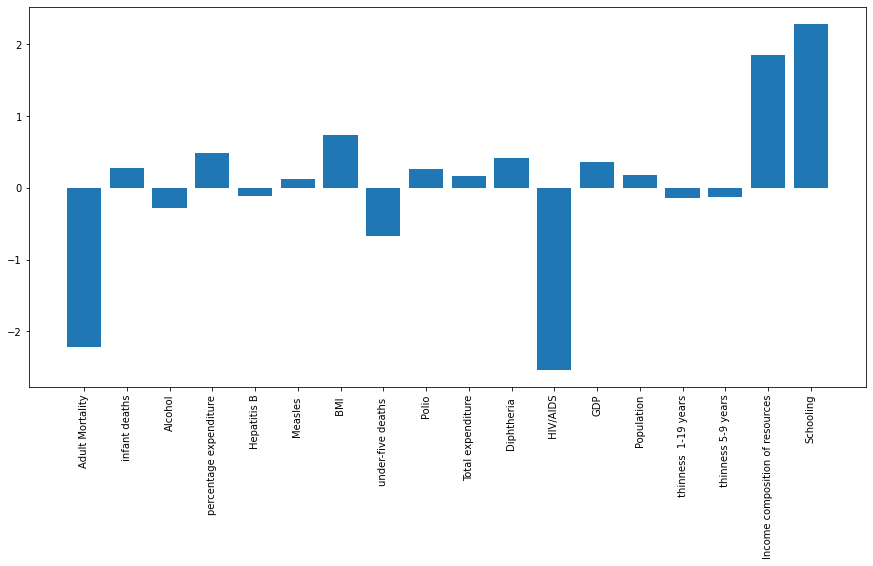

In [21]:
clf_scaled_ridge = Ridge(alpha=100, fit_intercept=True).fit(predictors_scaled, life_expectancy)
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
ax.bar(x_, clf_scaled_ridge.coef_)
ax.set_xticks(x_)
ax.set_xticklabels(labels, rotation=90)
plt.show();

### Part IV: cross validation

To find out how much we should optimally regularize, we use cross validation

**Tasks:**
1. Use sklearn to apply cross validation to Ridge and Lasso regression. Which values of alpha yield the best results?
2. Can you interpret these results? What does a low or large value of alpha imply?

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

In [18]:
alpha_values = [1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3]
scores_lasso = []
scores_ridge = []
cv = 5

for a in alpha_values:
    clf_ridge = make_pipeline(preprocessing.StandardScaler(), Ridge(alpha=a, fit_intercept=True))
    s_ridge = np.sum(cross_val_score(clf_ridge, predictors, life_expectancy, cv=cv))
    clf_lasso = make_pipeline(preprocessing.StandardScaler(), Lasso(alpha=a, fit_intercept=True, max_iter=10000))
    s_lasso = np.sum(cross_val_score(clf_lasso, predictors, life_expectancy, cv=cv))
    print(s_ridge, s_lasso)
    scores_ridge.append(s_ridge)
    scores_lasso.append(s_lasso)

3.9466084889482085 3.9581783381059332
3.9483089412520678 4.006731587447243
3.962795940971139 3.965786749718583
4.00491883972253 3.874329757145219
3.9734534315562726 -0.16267670266705236
3.955642175636699 -0.16267670266705236
3.800289918410004 -0.16267670266705236


### Final questions

1. Which kind of pitfalls did you notice during your application of different methods of regression?
2. How did you solve these pitfalls? 
3. If you come across linear regression coefficients in a paper, which kind of questions would come to your mind about these coefficients?
4. If you come across linear regression in a paper that claims to show a causal relationship, what do you look for in the paper?

**solutions:**
    
1. mostly unnormalized features; setting up cross validation pipeline
2. using the standardScaler(); using the make_pipeline tool from sklearn
3. Were the coefficients achieved in a reasonable manner?
    - Did they standardise their data?
    - Did they regularize their linear regression? If yes, by how much? Does this make sense in the context of the application?
    - Did they check in some way if their data is linear, e.g. by plotting them or statistical tests?
    - Did they have a test-train split and validated their coefficients before intepreting them?
4. Does the setup of the paper allow for a causal interpretation?
    - does the data come from observations or interventions?
    - If the data comes from observations, does it allow for causal interpretation, e.g. natural experiments